# Compare results of cell2location with 'gold standard'

The goal is to use cell type annotations from Xenium as gold standard and compare that with the results from cell2location.

This is done by comparing the correlation between the cell2location assigments globally, per spot, and per cell types

In [1]:
import pandas as pd

### Read mapping spot to cell id

In [2]:
spot2cell = pd.read_csv("all_combined_Xenium_cell_id.csv",
                       index_col=0)

In [3]:
spot2cell.sample(4)

,sample,spot,cell_id,cell_id_sample
37075-36319_H22762-1,H22762-1,37075-36319,ndheocai-1,ndheocai-1_H22762-1
42109-39436_RO727,RO727,42109-39436,jondoabh-1,jondoabh-1_RO727
28009-49306_RO727,RO727,28009-49306,cloamobh-1,cloamobh-1_RO727
22632-15672_RO3203,RO3203,22632-15672,dfafmoap-1,dfafmoap-1_RO3203


### Read cell2 location

In [4]:
c2l = pd.read_csv("all_combined_Visium_like_c2l_results.csv",
                  sep = ",",index_col=0)
c2l.head()

,AT0,AT1,AT2,Aberrant basaloid,Adventitial fibroblast,Alveolar fibroblast,Artery,B/Plasma,Basal,Basophil/Mast,...,Peribronchial fibroblast,Pericyte,Smooth Muscle,T cell,TB-SC,Vein,pDC,preTB-SC/RAS,sample,spot
3867-32127_H24513-17,0.000250,0.000783,0.000549,0.000236,0.000187,0.004541,0.000204,0.001445,0.000765,0.001159,...,0.000447,0.000590,0.000169,0.001548,0.000514,0.000129,0.001170,0.002284,H24513-17,3867-32127
3867-32597_H24513-17,0.003166,0.001280,0.008667,0.615890,0.006831,0.034795,0.004940,0.097064,0.020926,0.288796,...,0.023854,0.009296,0.027335,0.025412,0.018883,0.011651,0.021858,0.018464,H24513-17,3867-32597
3867-33067_H24513-17,0.000489,0.000747,0.000408,0.001423,0.082476,0.067737,0.011646,0.120562,0.007313,0.022342,...,0.030885,0.131418,0.281558,0.235741,0.004427,0.032492,0.238774,0.007190,H24513-17,3867-33067
3397-31657_H24513-17,0.000042,0.000124,0.000065,0.000189,0.000093,0.001054,0.000114,0.000467,0.002694,0.000521,...,0.000158,0.000169,0.002653,0.138251,0.000326,0.000091,0.003965,0.001094,H24513-17,3397-31657
3867-33537_H24513-17,0.000542,0.000508,0.000925,0.000387,0.062749,0.068022,0.007783,0.039607,0.001056,0.073601,...,0.023026,0.012344,0.010889,0.337897,0.001035,0.015675,0.042728,0.002252,H24513-17,3867-33537


### Read cell anotattions

In [6]:
celltypeannot = pd.read_csv("all_combined_Xenium_celltypeannot_from_labeltransfer_mixed.csv", sep = ",")
## rename cell_type_CM to cell_type for consistency with naming
celltypeannot.columns = ["cell_id_sample","cell_id","sample","cell_type"]
celltypeannot.head()

,cell_id_sample,cell_id,sample,cell_type
0,aaaabkik-1_H22762-1,aaaabkik-1,H22762-1,AT1
1,aaaacfbm-1_H22762-1,aaaacfbm-1,H22762-1,Capillary
2,aaaaidni-1_H22762-1,aaaaidni-1,H22762-1,Alveolar fibroblast
3,aaaajkle-1_H22762-1,aaaajkle-1,H22762-1,Alveolar fibroblast
4,aaaamcob-1_H22762-1,aaaamcob-1,H22762-1,Artery


In [7]:
celltypeannot = celltypeannot.drop(["cell_id_sample"], axis=1)

In [8]:
celltypeannot.head()

,cell_id,sample,cell_type
0,aaaabkik-1,H22762-1,AT1
1,aaaacfbm-1,H22762-1,Capillary
2,aaaaidni-1,H22762-1,Alveolar fibroblast
3,aaaajkle-1,H22762-1,Alveolar fibroblast
4,aaaamcob-1,H22762-1,Artery


### Create tidy table
The structure is `method`, `spot`, `cell_type`, `value`

For the cell2location is easy because each cell type is assigned a value for each spot.

For the manual annotation, the cell types need to be aggregated to get the counts. 

#### table for cell2location


In [9]:
# convert from long format to tidy format
tidy_c2l = pd.melt(c2l, id_vars=['spot', 'sample'], var_name='cell_type', value_name='value')

In [10]:
tidy_c2l.sample(5)

,spot,sample,cell_type,value
132060,29419-1836,RO727,Adventitial fibroblast,0.001188
785613,21429-3716,RO727,Myofibroblast,0.000479
1015295,29682-18022,RO3203,pDC,0.015050
499657,40699-9826,RO727,Lymphatic,0.000821
684216,6687-48107,H24513-17,Mesothelial,0.000153


In [11]:
## check that the values in cell type corrrespond to the cell types
cell_type_cols = ['AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast',
       'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast',
       'Bronchial Vessel', 'Capillary', 'Capillary Aerocyte', 'Ciliated',
       'Ciliated SFTPB+/SCGB1A1+', 'Dendritic', 'Ionocyte', 'Lymphatic',
       'Macrophage C1Q hi', 'Macrophage CHI3L1+/CD9 hi/', 'Macrophage FABP4+',
       'Macrophage IL1B+', 'Macrophage LYVE1+', 'Macrophage RETN+/VCAN+',
       'Mesothelial', 'Monocyte', 'Mucous', 'Myofibroblast', 'NK',
       'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell',
       'TB-SC', 'Vein', 'pDC', 'preTB-SC/RAS']
tidy_c2l['cell_type'] = tidy_c2l['cell_type'].astype('category')

assert set(tidy_c2l['cell_type'].cat.categories) == set(cell_type_cols)

#### table for cell type annotations

In [12]:
# 1. add spot id to the table
# 2. use groupby to get the number of cell types per spot 

tidy_annot = celltypeannot.merge(spot2cell, left_on=['cell_id', 'sample'], right_on=['cell_id', 'sample'] ) \
                            .set_index('cell_id_sample') \
                            .groupby(['spot', 'sample', 'cell_type']).size().reset_index(name='value')
                           

In [13]:
tidy_annot.sample(4)

,spot,sample,cell_type,value
133262,44287-42937,H24513-17,Ciliated,1
98731,35792-27422,RO3203,AT2,1
80393,31127-46227,H24513-17,Smooth Muscle,5
154799,8875-37729,H22762-1,NK,1


#### check that the cell_type matches the cell_type in c2l results

In [14]:
tidy_annot['cell_type'] = tidy_annot['cell_type'].astype('category')
set(tidy_annot['cell_type'].cat.categories).difference(cell_type_cols)

{'Adventital fibroblast', 'Macrophage'}

In [15]:
set(cell_type_cols).difference(tidy_annot['cell_type'].cat.categories)

{'Adventitial fibroblast', 'Peribronchial fibroblast'}

#### harmonize cell type names

In [ ]:
tidy_annot['cell_type'] = tidy_annot['cell_type'].cat.rename_categories(['AT0', 'AT1', 'AT2', 'Aberrant basaloid', 'Adventitial fibroblast',
       'Alveolar fibroblast', 'Artery', 'B/Plasma', 'Basal', 'Basophil/Mast',
       'Bronchial Vessel', 'Capillary', 'Ciliated', 'Ciliated SFTPB+/SCGB1A1+',
       'Dendritic', 'Lymphatic', 'Macrophage CHI3L1+/CD9 hi/',
       'Macrophage FABP4+', 'Monocyte', 'Mucous', 'Myofibroblast',
       'Peribronchial fibroblast', 'Pericyte', 'Smooth Muscle', 'T cell',
       'TB-SC', 'Vein', 'preTB-SC/RAS'])

In [17]:
set(tidy_annot['cell_type'].cat.categories).difference(cell_type_cols) == set()

False

In [ ]:
### here the check is to see if annot cell type is a subset of cell2location types
assert set(tidy_annot['cell_type'].cat.categories).difference(cell_type_cols) == set()

#### Merge for final tidy table

In [19]:
tidy_annot['method'] = 'annotation'
tidy_c2l['method'] = 'c2l'
tidy_df = pd.concat([tidy_c2l, tidy_annot], ignore_index=True)

In [20]:
tidy_df.sample(5)

,spot,sample,cell_type,value,method
197632,12762-39172,RO3203,Artery,0.001183,c2l
209717,32375-4359,H22762-1,B/Plasma,0.006676,c2l
1023337,17497-32597,H24513-17,preTB-SC/RAS,0.001134,c2l
435860,18745-21749,H22762-1,Dendritic,0.040616,c2l
801932,30495-16109,H22762-1,NK,0.001651,c2l


## Save results

In [21]:
tidy_df.to_csv("./tidy_df_c2l_and_cell_annot_label_transfer_mixed.csv")

#### Add random annotation
This is to compare agains random odds

In [ ]:
# per sample, swap randomly the spot ids.
tidy_annot['sample'] = tidy_annot['sample'].astype('category')
_tidy_list = []
for cat in tidy_annot['sample'].cat.categories:
    _tidy = tidy_annot[tidy_annot['sample'] == cat]
    swap_df = _tidy[['spot']].drop_duplicates()
    swap_df['new'] = swap_df['spot'].sample(frac=1).values
    swap_dict = swap_df.set_index('spot')['new'].to_dict()
    _tidy['spot'] = _tidy['spot'].map(swap_dict)
    _tidy_list.append(_tidy)

tidy_random = pd.concat(_tidy_list, ignore_index=True)
tidy_random['method'] = 'random'

In [23]:
tidy_df = pd.concat([tidy_c2l, tidy_annot, tidy_random], ignore_index=True)

## Visualize correlations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### compute pearson correlation 

For this we use pivot tables with different indices to compute method, cell_type, sample etc correlations

In [25]:
# for the pivot, what is specified in 'columns' is what is used for 
# the correlation. I this case `method` is selected to compare the
# overall correlation of the two methods

pivot_method = tidy_df.pivot(columns='method', index=['sample', 'spot', 'cell_type'], values='value').fillna(0)

### Compute method correlation

In [26]:
pivot_method.sample(5)

method                                            annotation       c2l  random
sample    spot        cell_type                                               
H22762-1  6995-46189  Macrophage CHI3L1+/CD9 hi/         0.0  0.002334     0.0
          10285-30679 AT2                                0.0  0.035212     0.0
H24513-17 9977-41997  Mesothelial                        0.0  0.003251     0.0
RO727     28479-49776 Ionocyte                           0.0  0.001885     0.0
H22762-1  20625-27389 B/Plasma                           0.0  0.012898     0.0

In [27]:
pivot_method.corr()

method,annotation,c2l,random
method,,,
annotation,1.000000,0.680937,0.159468
c2l,0.680937,1.000000,0.116864
random,0.159468,0.116864,1.000000


### compute cell type annotation correlation

In [28]:
pivot_cell_type = tidy_df.pivot(columns=['method', 'cell_type'], index=['sample', 'spot'], values='value').fillna(0)

In [29]:
pivot_cell_type.sample(5)

method                      c2l                                         
cell_type                   AT0       AT1       AT2 Aberrant basaloid   
sample    spot                                                          
H24513-17 35827-31187  0.000953  0.000448  0.007157          0.000463  \
          19377-27897  0.000798  0.000812  0.002968          0.000454   
          33477-34947  0.000156  0.023314  0.000170          0.000882   
H22762-1  36135-16109  1.136726  0.760461  3.267942          0.025398   
RO727     29419-28626  0.059874  0.738093  0.274335          0.002687   

method                                                                       
cell_type             Adventitial fibroblast Alveolar fibroblast    Artery   
sample    spot                                                               
H24513-17 35827-31187               0.010853            0.204000  0.023996  \
          19377-27897               0.052282            0.054136  0.002124   
          33477-34947               0.039768            0.458742  0.051120   
H22762-1  36135-16109               0.010594            0.011175  0.002703   
RO727     29419-28626               0.005789            0.170445  0.003622   

method                                                   ... random        
cell_type              B/Plasma     Basal Basophil/Mast  ...  TB-SC  AT0   
sample    spot                                           ...               
H24513-17 35827-31187  0.057320  0.001641      0.018671  ...    0.0  0.0  \
          19377-27897  0.023327  0.000832      0.063912  ...    0.0  0.0   
          33477-34947  0.312342  0.000755      0.366914  ...    0.0  0.0   
H22762-1  36135-16109  0.000887  0.003631      0.016337  ...    0.0  0.0   
RO727     29419-28626  0.002207  0.008849      0.352809  ...    0.0  0.0   

method                                                                 
cell_type             Ciliated Aberrant basaloid Mucous preTB-SC/RAS   
sample    spot                                                         
H24513-17 35827-31187      0.0               0.0    0.0          0.0  \
          19377-27897      0.0               0.0    0.0          0.0   
          33477-34947      0.0               0.0    0.0          0.0   
H22762-1  36135-16109      1.0               0.0    0.0          0.0   
RO727     29419-28626      0.0               0.0    0.0          0.0   

method                                                                          
cell_type             Macrophage LYVE1+  pDC Ciliated SFTPB+/SCGB1A1+ Ionocyte  
sample    spot                                                                  
H24513-17 35827-31187               0.0  0.0                      0.0      0.0  
          19377-27897               0.0  0.0                      0.0      0.0  
          33477-34947               0.0  0.0                      0.0      0.0  
H22762-1  36135-16109               0.0  0.0                      0.0      0.0  
RO727     29419-28626               0.0  0.0                      0.0      0.0  

[5 rows x 111 columns]

In [30]:
corr = pivot_cell_type.corr()
corr

method                                c2l                       
cell_type                             AT0       AT1       AT2   
method cell_type                                                
c2l    AT0                       1.000000  0.564125  0.758216  \
       AT1                       0.564125  1.000000  0.536185   
       AT2                       0.758216  0.536185  1.000000   
       Aberrant basaloid         0.055254 -0.014881 -0.012534   
       Adventitial fibroblast   -0.112162 -0.190342 -0.121267   
...                                   ...       ...       ...   
random preTB-SC/RAS              0.002448 -0.007386  0.003811   
       Macrophage LYVE1+         0.006209  0.008905  0.008826   
       pDC                      -0.007433  0.017331 -0.009482   
       Ciliated SFTPB+/SCGB1A1+ -0.018190 -0.045071 -0.021312   
       Ionocyte                  0.013009  0.018213  0.005422   

method                                                                     
cell_type                       Aberrant basaloid Adventitial fibroblast   
method cell_type                                                           
c2l    AT0                               0.055254              -0.112162  \
       AT1                              -0.014881              -0.190342   
       AT2                              -0.012534              -0.121267   
       Aberrant basaloid                 1.000000              -0.054886   
       Adventitial fibroblast           -0.054886               1.000000   
...                                           ...                    ...   
random preTB-SC/RAS                     -0.006081              -0.002820   
       Macrophage LYVE1+                -0.002560              -0.003953   
       pDC                              -0.006115              -0.018966   
       Ciliated SFTPB+/SCGB1A1+          0.004688              -0.004218   
       Ionocyte                          0.000351               0.000078   

method                                                                    
cell_type                       Alveolar fibroblast    Artery  B/Plasma   
method cell_type                                                          
c2l    AT0                                 0.006300 -0.055319 -0.083364  \
       AT1                                 0.027718 -0.059871 -0.125041   
       AT2                                 0.042960 -0.060811 -0.092558   
       Aberrant basaloid                  -0.078444 -0.038891 -0.037534   
       Adventitial fibroblast             -0.013970 -0.027236  0.042498   
...                                             ...       ...       ...   
random preTB-SC/RAS                       -0.010840 -0.006168  0.009138   
       Macrophage LYVE1+                   0.014792  0.007854 -0.002955   
       pDC                                -0.010796  0.003802 -0.009896   
       Ciliated SFTPB+/SCGB1A1+           -0.025426 -0.010747  0.023169   
       Ionocyte                            0.013317  0.002547 -0.001148   

method                                                   ...    random   
cell_type                           Basal Basophil/Mast  ...     TB-SC   
method cell_type                                         ...             
c2l    AT0                      -0.040033      0.010467  ...  0.007207  \
       AT1                      -0.064233     -0.037463  ... -0.019652   
       AT2                      -0.050141      0.016346  ...  0.005389   
       Aberrant basaloid         0.142764     -0.042589  ...  0.011028   
       Adventitial fibroblast   -0.044870      0.010901  ... -0.004296   
...                                   ...           ...  ...       ...   
random preTB-SC/RAS              0.000689      0.011389  ...  0.278384   
       Macrophage LYVE1+        -0.002757     -0.002844  ... -0.003556   
       pDC                      -0.008464     -0.010109  ... -0.004513   
       Ciliated SFTPB+/SCGB1A1+  0.016633      0.010992  ...  0.122731   
       Iono

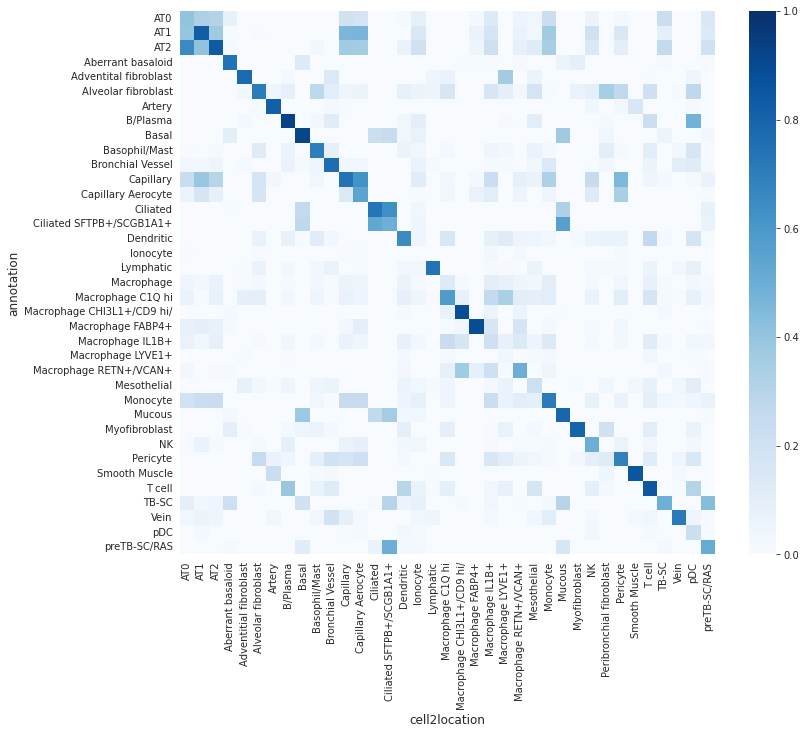

<Figure size 432x288 with 0 Axes>

In [32]:
# select for columns c2l and for rows annotation
plt.rcParams['pdf.fonttype'] = 42
res = corr[['c2l']].loc[['annotation']]
res.columns = res.columns.droplevel()
res.index = res.index.droplevel()

res = res.sort_index().sort_index(axis=1)

sns.set_style("white")

# Create the heatmap
plt.figure(figsize=(12, 10))  # You can adjust the size of the figure
ax = sns.heatmap(res, 
            cmap='Blues', # Color map
            cbar=True,       # Show color bar
            vmin=0,
            vmax=1
           )   # Space between cells

ax.set_xlabel('cell2location', fontsize=12)  # Set the label for the x-axis
ax.set_ylabel('annotation', fontsize=12)  # Set the label for the y-axis

# Show the plot
plt.show()
plt.savefig("./figures/Xenium_manual_annot_vs_c2l_corr_labeltransfer_mixed.pdf")

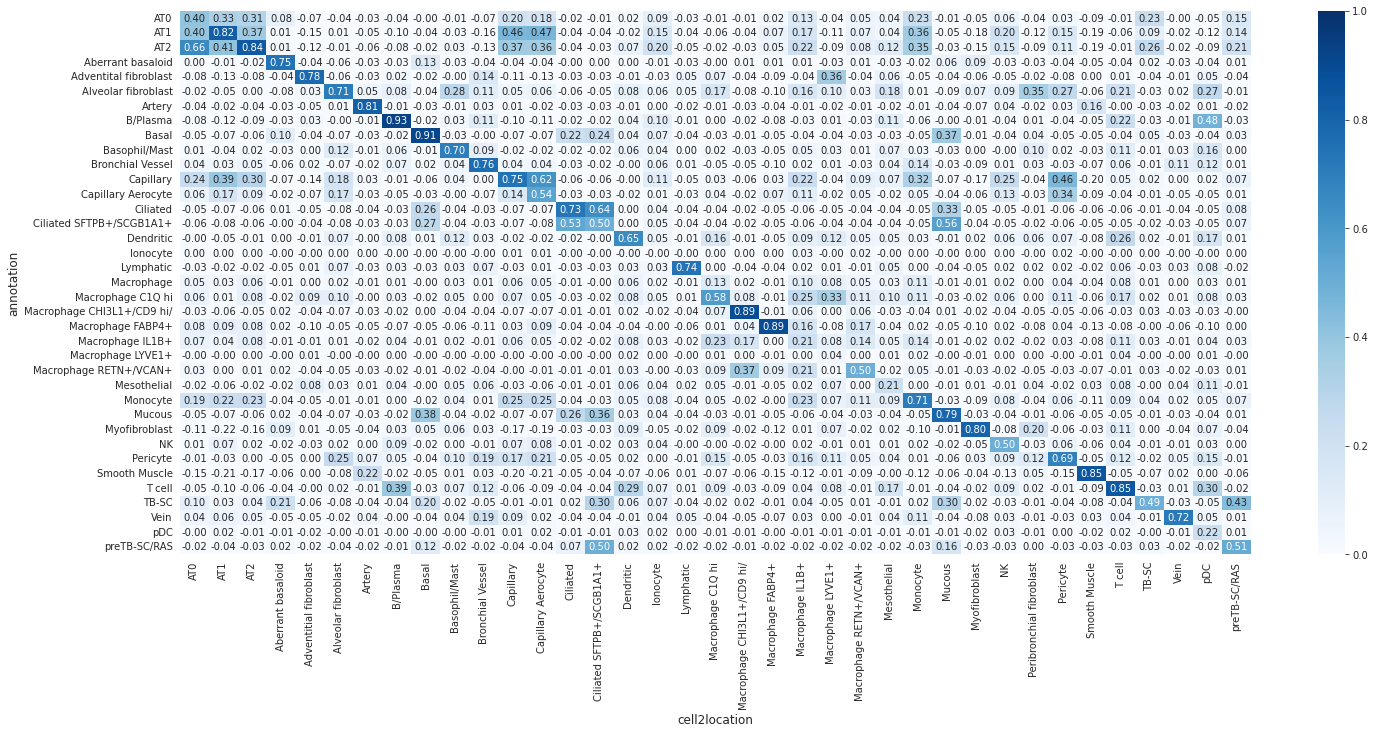

In [33]:
# select for columns c2l and for rows annotation
res = corr[['c2l']].loc[['annotation']]
res.columns = res.columns.droplevel()
res.index = res.index.droplevel()

res = res.sort_index().sort_index(axis=1)

sns.set_style("white")

# Create the heatmap
plt.figure(figsize=(24, 10))  # You can adjust the size of the figure
ax = sns.heatmap(res, 
            cmap='Blues', # Color map
            cbar=True,       # Show color bar
            vmin=0,
            vmax=1,
                  annot=True, fmt=".2f"
           )   # Space between cells

ax.set_xlabel('cell2location', fontsize=12)  # Set the label for the x-axis
ax.set_ylabel('annotation', fontsize=12)  # Set the label for the y-axis
plt.savefig("./figures/Xenium_manual_annot_vs_c2l_corr_annot_labeltransfer_mixed.pdf")
# Show the plot
plt.show()


#### compare c2l with random

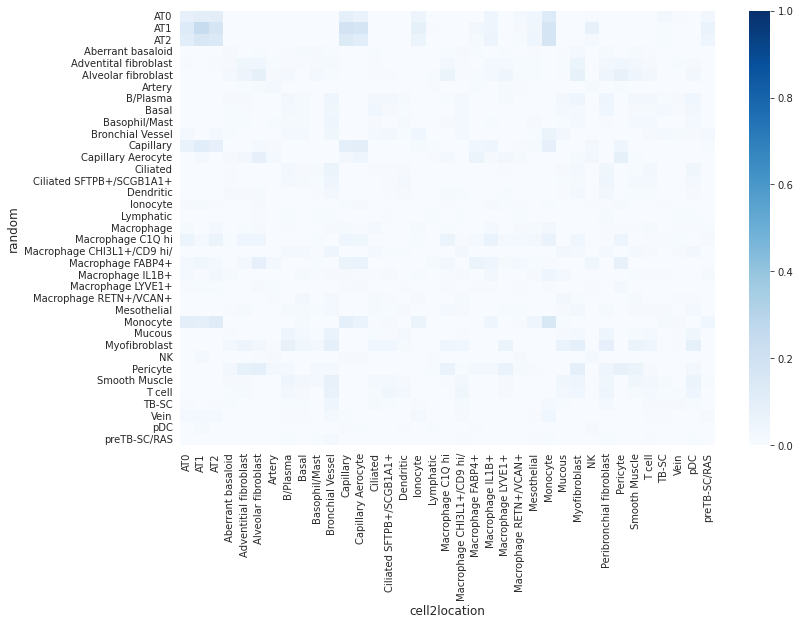

<Figure size 432x288 with 0 Axes>

In [34]:
# select for columns c2l and for rows annotation
res = corr[['c2l']].loc[['random']]
res.columns = res.columns.droplevel()
res.index = res.index.droplevel()

res = res.sort_index().sort_index(axis=1)

sns.set_style("white")

# Create the heatmap
plt.figure(figsize=(12, 8))  # You can adjust the size of the figure
ax = sns.heatmap(res, 
            cmap='Blues', # Color map
            cbar=True,       # Show color bar
            vmin=0,
            vmax=1
           )   # Space between cells

ax.set_xlabel('cell2location', fontsize=12)  # Set the label for the x-axis
ax.set_ylabel('random', fontsize=12)  # Set the label for the y-axis

# Show the plot
plt.show()
plt.savefig("./figures/Xenium_manual_annot_vs_c2l_corr_random_labeltransfer_mixed.pdf")

### compute sample annotation correlation

In [35]:
pivot_sample = tidy_df.pivot(columns=['method', 'sample'], index=['spot', 'cell_type'], values='value').fillna(0)

In [36]:
pivot_sample

method                                  c2l                            
sample                            H24513-17 H22762-1 RO727    RO3203   
spot       cell_type                                                   
1012-10972 AT0                     0.000000      0.0   0.0  0.000923  \
           AT1                     0.000000      0.0   0.0  0.002095   
           AT2                     0.000000      0.0   0.0  0.001114   
           Aberrant basaloid       0.000000      0.0   0.0  0.001051   
           Adventitial fibroblast  0.000000      0.0   0.0  0.015142   
...                                     ...      ...   ...       ...   
9977-5337  T cell                  0.001333      0.0   0.0  0.000000   
           TB-SC                   0.000070      0.0   0.0  0.000000   
           Vein                    0.000139      0.0   0.0  0.000000   
           pDC                     0.000458      0.0   0.0  0.000000   
           preTB-SC/RAS            0.000133      0.0   0.0  0.000000   

method                            annotation                            
sample                                RO3203 RO727 H22762-1 H24513-17   
spot       cell_type                                                    
1012-10972 AT0                           0.0   0.0      0.0       0.0  \
           AT1                           0.0   0.0      0.0       0.0   
           AT2                           0.0   0.0      0.0       0.0   
           Aberrant basaloid             0.0   0.0      0.0       0.0   
           Adventitial fibroblast        0.0   0.0      0.0       0.0   
...                                      ...   ...      ...       ...   
9977-5337  T cell                        0.0   0.0      0.0       0.0   
           TB-SC                         0.0   0.0      0.0       0.0   
           Vein                          0.0   0.0      0.0       0.0   
           pDC                           0.0   0.0      0.0       0.0   
           preTB-SC/RAS                  0.0   0.0      0.0       0.0   

method                              random                         
sample                            H22762-1 H24513-17 RO3203 RO727  
spot       cell_type                                               
1012-10972 AT0                         0.0       0.0    0.0   0.0  
           AT1                         0.0       0.0    0.0   0.0  
           AT2                         0.0       0.0    1.0   0.0  
           Aberrant basaloid           0.0       0.0    0.0   0.0  
           Adventitial fibroblast      0.0       0.0    0.0   0.0  
...                                    ...       ...    ...   ...  
9977-5337  T cell                      0.0       0.0    0.0   0.0  
           TB-SC                       0.0       0.0    0.0   0.0  
           Vein                        0.0       0.0    0.0   0.0  
           pDC                         0.0       0.0    0.0   0.0  
           preTB-SC/RAS                0.0       0.0    0.0   0.0  

[1054361 rows x 12 columns]

In [37]:
corr = pivot_sample.corr()
corr[['c2l']].loc[['annotation']]

method                     c2l                              
sample               H24513-17  H22762-1     RO727    RO3203
method     sample                                           
annotation RO3203    -0.021211 -0.023410 -0.020346  0.703904
           RO727     -0.023038 -0.025427  0.673716 -0.020359
           H22762-1  -0.024382  0.740527 -0.023388 -0.021547
           H24513-17  0.748318 -0.026638 -0.023152 -0.021329

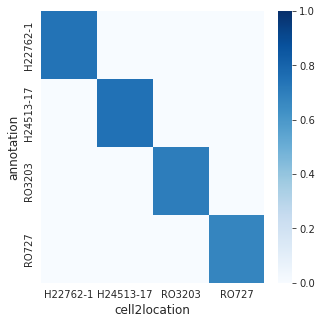

In [38]:
# select for columns c2l and for rows annotation
res = corr[['c2l']].loc[['annotation']]
res.columns = res.columns.droplevel()
res.index = res.index.droplevel()

res = res.sort_index().sort_index(axis=1)

sns.set_style("white")

# Create the heatmap
plt.figure(figsize=(5, 5))  # You can adjust the size of the figure
ax = sns.heatmap(res, 
            cmap='Blues', # Color map
            cbar=True,       # Show color bar
            vmin=0,
            vmax=1
           )   # Space between cells

ax.set_xlabel('cell2location', fontsize=12)  # Set the label for the x-axis
ax.set_ylabel('annotation', fontsize=12)  # Set the label for the y-axis
plt.savefig("./figures/Xenium_manual_annot_vs_c2l_corr_samples_labeltransfer_mixed.pdf")
# Show the plot
plt.show()

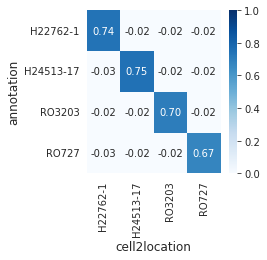

In [39]:
# Create the heatmap
plt.figure(figsize=(3, 3))  # You can adjust the size of the figure
ax = sns.heatmap(res, 
            cmap='Blues', # Color map
            cbar=True,       # Show color bar
            vmin=0,
            vmax=1,
            annot=True, fmt=".2f", # This will plot the values in the heatmap
     
           )   # Space between cells

ax.set_xlabel('cell2location', fontsize=12)  # Set the label for the x-axis
ax.set_ylabel('annotation', fontsize=12)  # Set the label for the y-axis

# Rotate the tick labels
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig("./figures/Xenium_manual_annot_vs_c2l_corr_samples_annot_labeltransfer_mixed.pdf")
# Show the plot
plt.show()
